# New Section

COREML



 Generated η: 0.56
Total samples: 50000
Corrupted samples: 27980 (55.96%)


=== Training at η=0.2 ===

Training CE...
Epoch 001 | Loss: 2.0250 | Acc: 41.98%
Epoch 002 | Loss: 1.8064 | Acc: 48.72%
Epoch 003 | Loss: 1.6597 | Acc: 49.90%
Epoch 004 | Loss: 1.5774 | Acc: 60.70%
Epoch 005 | Loss: 1.4998 | Acc: 64.39%
Epoch 006 | Loss: 1.4407 | Acc: 64.57%
Epoch 007 | Loss: 1.3872 | Acc: 73.02%
Epoch 008 | Loss: 1.3452 | Acc: 71.54%
Epoch 009 | Loss: 1.3135 | Acc: 75.62%
Epoch 010 | Loss: 1.2796 | Acc: 65.63%
Epoch 011 | Loss: 1.2551 | Acc: 73.26%
Epoch 012 | Loss: 1.2263 | Acc: 72.83%
Epoch 013 | Loss: 1.2043 | Acc: 68.53%
Epoch 014 | Loss: 1.1879 | Acc: 79.31%
Epoch 015 | Loss: 1.1668 | Acc: 78.71%
Epoch 016 | Loss: 1.1518 | Acc: 79.15%
Epoch 017 | Loss: 1.1397 | Acc: 81.11%
Epoch 018 | Loss: 1.1278 | Acc: 80.84%
Epoch 019 | Loss: 1.1177 | Acc: 78.36%
Epoch 020 | Loss: 1.1043 | Acc: 81.03%
Epoch 021 | Loss: 1.0925 | Acc: 80.36%
Epoch 022 | Loss: 1.0811 | Acc: 82.69%
Epoch 023 | Loss: 1.069

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7cddec5267a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process


Epoch 056 | Loss: 0.4014 | Acc: 76.45%
Epoch 057 | Loss: 0.3751 | Acc: 76.51%
Epoch 058 | Loss: 0.3537 | Acc: 74.09%
Epoch 059 | Loss: 0.3347 | Acc: 79.49%
Epoch 060 | Loss: 0.3058 | Acc: 80.40%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7cddec5267a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
  Exception ignored in:   <function _MultiProcessingDataLoaderIter.__del__ at 0x7cddec5267a0> 
 Traceback (most recent call last):
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
^    ^self._shutdown_workers()^
^  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
^^^    ^if w.is_alive():^
^^ ^  
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
       assert self._parent_pid == os.getpid(), 'can only test a child process' 
^ ^ ^ ^ ^ ^    ^^ ^ ^^^^^^
^^  File 

Epoch 061 | Loss: 0.2867 | Acc: 74.36%
Epoch 062 | Loss: 0.2605 | Acc: 74.56%
Epoch 063 | Loss: 0.2391 | Acc: 78.65%
Epoch 064 | Loss: 0.2233 | Acc: 76.33%
Epoch 065 | Loss: 0.2025 | Acc: 78.87%
Epoch 066 | Loss: 0.1824 | Acc: 77.43%
Epoch 067 | Loss: 0.1688 | Acc: 75.50%
Epoch 068 | Loss: 0.1545 | Acc: 78.76%
Epoch 069 | Loss: 0.1366 | Acc: 77.80%
Epoch 070 | Loss: 0.1258 | Acc: 79.01%
Epoch 071 | Loss: 0.1117 | Acc: 78.43%
Epoch 072 | Loss: 0.1029 | Acc: 76.48%
Epoch 073 | Loss: 0.0951 | Acc: 80.35%
Epoch 074 | Loss: 0.0841 | Acc: 79.37%
Epoch 075 | Loss: 0.0785 | Acc: 80.47%
Epoch 076 | Loss: 0.0683 | Acc: 80.64%
Epoch 077 | Loss: 0.0614 | Acc: 80.03%
Epoch 078 | Loss: 0.0559 | Acc: 81.09%
Epoch 079 | Loss: 0.0506 | Acc: 79.84%
Epoch 080 | Loss: 0.0445 | Acc: 80.51%
Epoch 081 | Loss: 0.0398 | Acc: 81.50%
Epoch 082 | Loss: 0.0338 | Acc: 81.64%
Epoch 083 | Loss: 0.0323 | Acc: 81.10%
Epoch 084 | Loss: 0.0284 | Acc: 80.97%
Epoch 085 | Loss: 0.0242 | Acc: 81.85%
Epoch 086 | Loss: 0.0217 

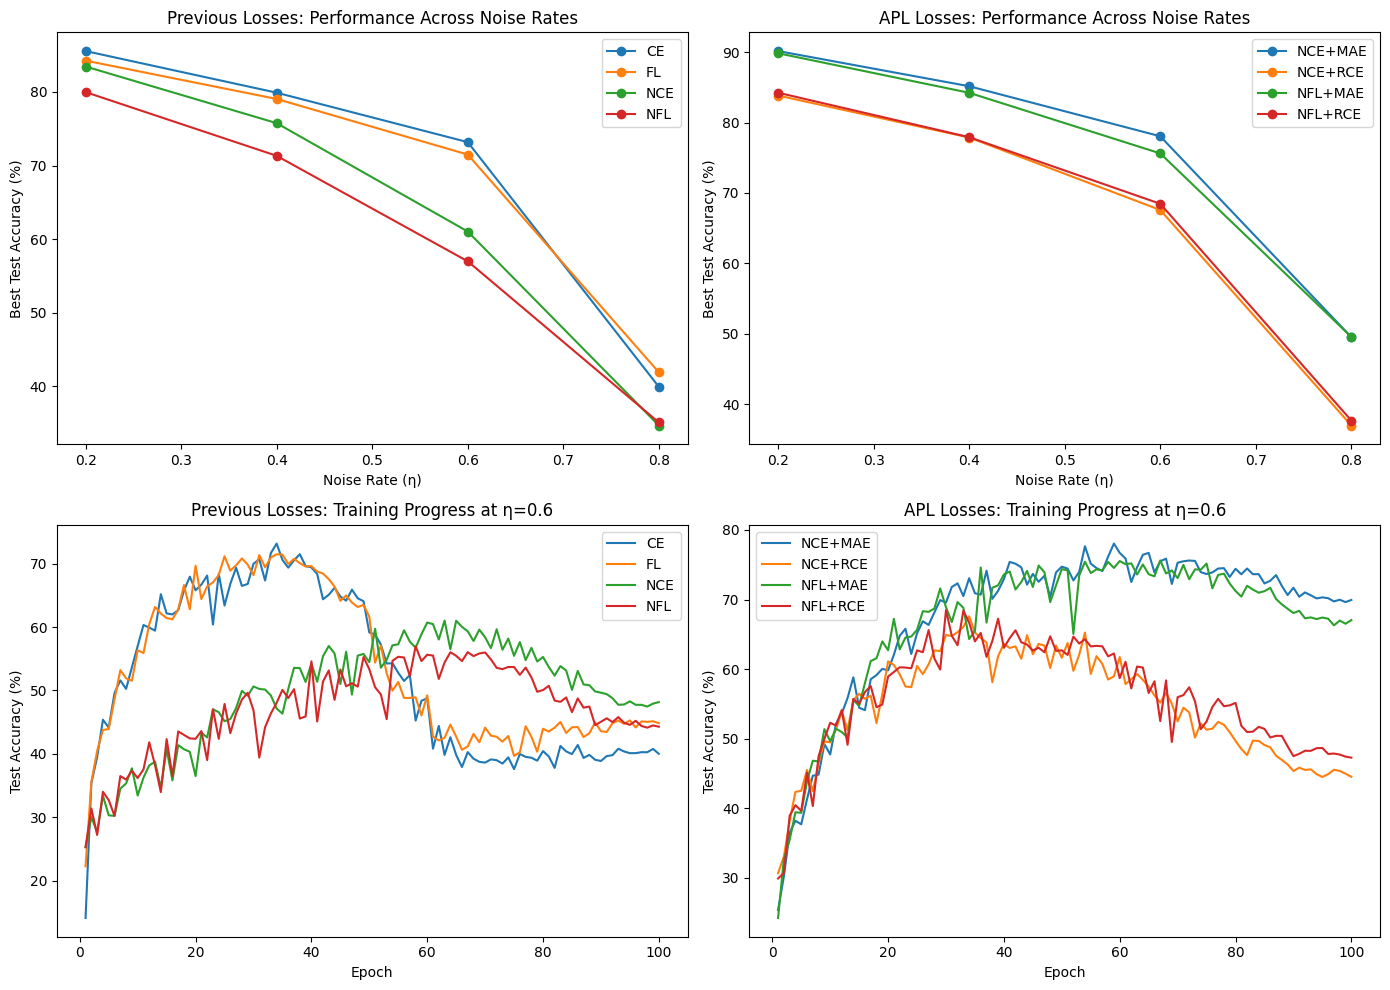

In [9]:
import torch
torch.set_float32_matmul_precision('high')  # <--- Add this line
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from torchvision.datasets import CIFAR10


def add_symmetric_noise(dataset, eta = None, seed=42):
    # Generate random η if not provided
    if eta is None:
        eta = torch.empty(1).uniform_(0.2, 0.8).item()

    # Set seed for reproducibility
    torch.manual_seed(seed)
    targets = torch.tensor(dataset.targets)
    num_classes = len(dataset.classes)
    noise_matrix = torch.zeros((num_classes, num_classes), dtype=torch.long)
    original_targets = targets.clone()

    for orig_class in range(num_classes):
        class_mask = original_targets == orig_class
        class_indices = class_mask.nonzero(as_tuple=True)[0]
        n_samples = class_indices.size(0)
        n_noisy = int(eta * n_samples)

        if n_noisy > 0:
            # Randomly select samples to corrupt using PyTorch
            perm = torch.randperm(n_samples)[:n_noisy]
            noisy_idx = class_indices[perm]

            # Generate new labels using PyTorch
            possible_classes = torch.arange(num_classes, device=targets.device)
            possible_classes = possible_classes[possible_classes != orig_class]
            new_labels = possible_classes[torch.randint(0, len(possible_classes), (n_noisy,))]

            # Update targets and noise matrix
            targets[noisy_idx] = new_labels
            unique_new, counts = torch.unique(new_labels, return_counts=True)
            noise_matrix[orig_class].index_add_(0, unique_new, counts)
            noise_matrix[orig_class, orig_class] += n_samples - n_noisy

    # Convert back to list for dataset compatibility
    dataset.targets = targets.tolist()

    return dataset, noise_matrix, original_targets, eta

# Load CIFAR-10 dataset
train_dataset = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# Then pass it to the noise function
noisy_dataset, noise_matrix, original_targets, eta = add_symmetric_noise(train_dataset)
noisy_targets = torch.tensor(noisy_dataset.targets)

# Print statistics
total_samples = original_targets.size(0)
corrupted_count = (original_targets != noisy_targets).sum().item()
print(f"\n Generated η: {eta:.2f}")
print(f"Total samples: {total_samples}")
print(f"Corrupted samples: {corrupted_count} ({corrupted_count/total_samples:.2%})\n")


class NormalizedCrossEntropy(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.eps = eps

    def forward(self, logits, targets):
        probs = F.softmax(logits, dim=1)
        ce = -torch.log(probs[torch.arange(logits.size(0)), targets] + 1e-8)
        norm = -torch.sum(torch.log(probs + 1e-8), dim=1)  # Sum(CE)
        return torch.mean(ce / norm)


class NormalizedFocalLoss(nn.Module):
    def __init__(self, gamma=2.0, eps=1e-8):
        super().__init__()
        self.gamma = gamma
        self.eps = eps

    def forward(self, logits, targets):
        probs = torch.softmax(logits, dim=1)
        focal = (1 - probs[torch.arange(logits.size(0)), targets])**self.gamma * \
               -torch.log(probs[torch.arange(logits.size(0)), targets] + self.eps)
        sum_fl = torch.sum((1 - probs)**self.gamma * -torch.log(probs + self.eps), dim=1)
        return torch.mean(focal / (sum_fl + self.eps))

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=1.0):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, logits, targets):
        ce_loss = F.cross_entropy(logits, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

class MAELoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, logits, targets):
        probs = F.softmax(logits, dim=1)
        one_hot = F.one_hot(targets, num_classes=probs.size(1)).float()
        mae = torch.mean(torch.abs(probs - one_hot), dim=1)
        return torch.mean(mae)

class RCE(nn.Module):
    def __init__(self, A=-0.69):
        super().__init__()
        self.A = A

    def forward(self, logits, targets):
        probs = F.softmax(logits, dim=1)
        batch_size, num_classes = logits.shape
        one_hot = F.one_hot(targets, num_classes).float()
        mask = torch.where(one_hot == 1, 0.0,
                          torch.exp(torch.tensor(self.A, device=logits.device)))
        # Corrected line: Use log(1 - probs) for incorrect classes
        return -torch.sum(mask * torch.log(1 - probs + 1e-8)) / batch_size

class APL(nn.Module):
    def __init__(self, active_loss, passive_loss, alpha=1.0, beta=1.0):
        super().__init__()
        self.active = active_loss
        self.passive = passive_loss
        self.alpha = alpha
        self.beta = beta

    def forward(self, logits, targets):
        return self.alpha*self.active(logits, targets) + self.beta*self.passive(logits, targets)

class CIFARResNet(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.model = resnet18(num_classes=num_classes)
        self.model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.model.maxpool = nn.Identity()
        self.model = torch.compile(self.model)  # PyTorch 2.x graph optimization


    def forward(self, x):
        return self.model(x)

def train_model(eta, loss_fn, num_epochs=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
    ])

    train_set = CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_set = CIFAR10(root='./data', train=False, download=True, transform=transform)

    noisy_train, _, _, _ = add_symmetric_noise(train_set, eta=eta, seed=42)

    train_loader = DataLoader(noisy_train, batch_size=512, shuffle=True, num_workers=8, pin_memory=True, persistent_workers=True)
    test_loader = DataLoader(test_set, batch_size=1024, shuffle=False, num_workers=8, pin_memory=True, persistent_workers=True)

    model = CIFARResNet().to(device)

    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    metrics = {'train_loss': [], 'test_acc': [], 'best_acc': 0.0}

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0.0

        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            epoch_loss += loss.item() * inputs.size(0)

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += predicted.eq(targets).sum().item()
                total += targets.size(0)

        avg_loss = epoch_loss / len(train_loader.dataset)
        test_acc = 100 * correct / total
        metrics['train_loss'].append(avg_loss)
        metrics['test_acc'].append(test_acc)
        metrics['best_acc'] = max(metrics['best_acc'], test_acc)

        print(f'Epoch {epoch+1:03d} | Loss: {avg_loss:.4f} | Acc: {test_acc:.2f}%')
        scheduler.step()

    return metrics

# Updated Plotting
def plot_results(results):
    eta_values = [0.2, 0.4, 0.6, 0.8]
    plt.figure(figsize=(14, 10))

    # Plot 1: Best Accuracy vs. Noise Rate (Previous Losses)
    plt.subplot(2, 2, 1)
    previous_losses = ['CE', 'FL', 'NCE', 'NFL']
    for loss_name in previous_losses:
        accuracies = [results[eta][loss_name]['best_acc'] for eta in eta_values]
        plt.plot(eta_values, accuracies, marker='o', label=loss_name)
    plt.xlabel('Noise Rate (η)')
    plt.ylabel('Best Test Accuracy (%)')
    plt.title('Previous Losses: Performance Across Noise Rates')
    plt.legend()

    # Plot 2: Best Accuracy vs. Noise Rate (APL Losses)
    plt.subplot(2, 2, 2)
    apl_losses = ['NCE+MAE', 'NCE+RCE', 'NFL+MAE', 'NFL+RCE']
    for loss_name in apl_losses:
        accuracies = [results[eta][loss_name]['best_acc'] for eta in eta_values]
        plt.plot(eta_values, accuracies, marker='o', label=loss_name)
    plt.xlabel('Noise Rate (η)')
    plt.ylabel('Best Test Accuracy (%)')
    plt.title('APL Losses: Performance Across Noise Rates')
    plt.legend()

    # Plot 3: Training Curves for η=0.6 (Previous Losses)
    eta = 0.6
    plt.subplot(2, 2, 3)
    for loss_name in previous_losses:
        acc_curve = results[eta][loss_name]['acc_curve']
        plt.plot(range(1, len(acc_curve) + 1), acc_curve, label=loss_name)
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.title(f'Previous Losses: Training Progress at η={eta}')
    plt.legend()

    # Plot 4: Training Curves for η=0.6 (APL Losses)
    plt.subplot(2, 2, 4)
    for loss_name in apl_losses:
        acc_curve = results[eta][loss_name]['acc_curve']
        plt.plot(range(1, len(acc_curve) + 1), acc_curve, label=loss_name)
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.title(f'APL Losses: Training Progress at η={eta}')
    plt.legend()

    plt.tight_layout()
    plt.savefig('coreml_apl_results.png')
    plt.show()


def run_experiments():
    torch.manual_seed(42)
    eta_values = [0.2, 0.4, 0.6, 0.8]

    # Initialize all loss functions
    nce = NormalizedCrossEntropy()
    nfl = NormalizedFocalLoss()
    mae = MAELoss()
    rce = RCE()

    loss_configs = {
        'CE': nn.CrossEntropyLoss(),
        'NCE': nce,
        'FL': FocalLoss(),
        'NFL': nfl,
        'NCE+MAE': APL(nce, mae, alpha=1, beta=1),
        'NCE+RCE': APL(nce, rce, alpha=0.5, beta=1),
        'NFL+MAE': APL(nfl, mae, alpha=1, beta=1),
        'NFL+RCE': APL(nfl, rce, alpha=0.3, beta=1)
    }

    results = {eta: {} for eta in eta_values}

    for eta in eta_values:
        print(f"\n=== Training at η={eta} ===")

        for loss_name, loss_fn in loss_configs.items():
            print(f"\nTraining {loss_name}...")
            metrics = train_model(eta, loss_fn, num_epochs=100)
            results[eta][loss_name] = {
                'best_acc': metrics['best_acc'],
                'acc_curve': metrics['test_acc']
            }
    print("\nFinal Comparison:")
    print(f"{'Loss':<10} {'η=0.2':<8} {'η=0.4':<8} {'η=0.6':<8} {'η=0.8':<8}")
    for loss_name in loss_configs:
        acc_values = [f"{results[eta][loss_name]['best_acc']:.2f}%" for eta in eta_values]
        print(f"{loss_name:<10} {' '.join(acc_values)}")

    # Save and plot results
    plot_results(results)
    return results

if __name__ == "__main__":
    final_results = run_experiments()